<a href="https://colab.research.google.com/github/insomaniacvenkat/gunviolence/blob/main/Gun_violence_2023_%26_2024_(WIP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'us-gun-violence-2024:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4587643%2F7828404%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240312%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240312T230615Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Dca0e9d8cadb7b5a9ab6279993d5395e7b56569802b499aa57a0b4d21f2e77a7e3c3a68973d779615846133462169275ca4e023f2f975968c6a4797005e8cec010f082cdd95780cd717b59e2c27ff7942122f7a9226a6e4b38cba93e7cacfc5a5e6af5ccab2fb74f4e645ee46efce8254fb36109098bbf337c9c0e80675a2076708f7b039fa8d9cf0b2d59183fd53ce0e1defa49d2748e8c0eb2aab9388a28a265230380a314f98c5a7b4220f031d430cb99cc5a710ee3c6c28c19b2edfaf73c2901a2cd8bcbe6a51223ab3f5cb133a796fa93e37d5f6937cd4a06405965976202bb17a6497c82f02cb3123e5988a2637a4b3368744a7aed226a4cc7534de7ca5,2023-us-gun-violence:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F4587655%2F7828419%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240312%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240312T230615Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5181277bc7362ef85750da555868adfccd5567174d21d33c2312c35030119e33b3db509efd63fc3f9020e0512b39bdb3aa688f2b2fc25e411fce7fe3f8ff14be216aa020c9a1cafc0b1d313643d66c9ffed83f9b7a8dd7e7832f0d3bbb2b25b76f8099d19f5aa3577a452df9fdc58416b8e455f2f01988f4d9bdb69920f7112f988ae54a5553652e97f9a985b602de1d08784296644eb9a09ee5be2c54bc5e2b4ec7693187b9bbac084b0b59c0f8e52f67bccb0decdea4cbfeb65c5ce9c910bc52c5d3021769bf6426517f1aafbc3ad8fefd727268282abeb5a85ea3b8edfbb2e4f4ed91d2583c42c9d76e9c73d787b813e689858b680cc4e715216006a54f98'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 2598 bytes downloaded
Downloaded and uncompressed: us-gun-violence-2024
[==================================================] 16093 bytes downloaded
Downloaded and uncompressed: 2023-us-gun-violence
Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/2023-us-gun-violence/us-gun-violence-2023.csv")
data.head()

,Incident ID,Incident Date,State,City Or County,Address,Victims Killed,Victims Injured,Suspects Killed,Suspects Injured,Suspects Arrested,Operations
0,2790854,"December 31, 2023",California,Hawthorne,14125 Crenshaw Blvd,1,5,0,0,0,NaN
1,2791696,"December 31, 2023",South Carolina,Little River,3389 Hwy 9 E,2,2,0,0,0,NaN
2,2791341,"December 31, 2023",North Carolina,Charlotte,300 S Church St,0,5,0,0,1,NaN
3,2790081,"December 30, 2023",Colorado,Denver,4888 W Colfax Ave,2,2,0,0,0,NaN
4,2790633,"December 30, 2023",Texas,Beaumont,6500 block of Bigner Rd,1,4,0,0,0,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Incident ID        656 non-null    int64  
 1   Incident Date      656 non-null    object 
 2   State              656 non-null    object 
 3   City Or County     656 non-null    object 
 4   Address            654 non-null    object 
 5   Victims Killed     656 non-null    int64  
 6   Victims Injured    656 non-null    int64  
 7   Suspects Killed    656 non-null    int64  
 8   Suspects Injured   656 non-null    int64  
 9   Suspects Arrested  656 non-null    int64  
 10  Operations         0 non-null      float64
dtypes: float64(1), int64(6), object(4)
memory usage: 56.5+ KB


In [5]:
filtered_data = data.dropna(subset=['State', 'Victims Killed'])

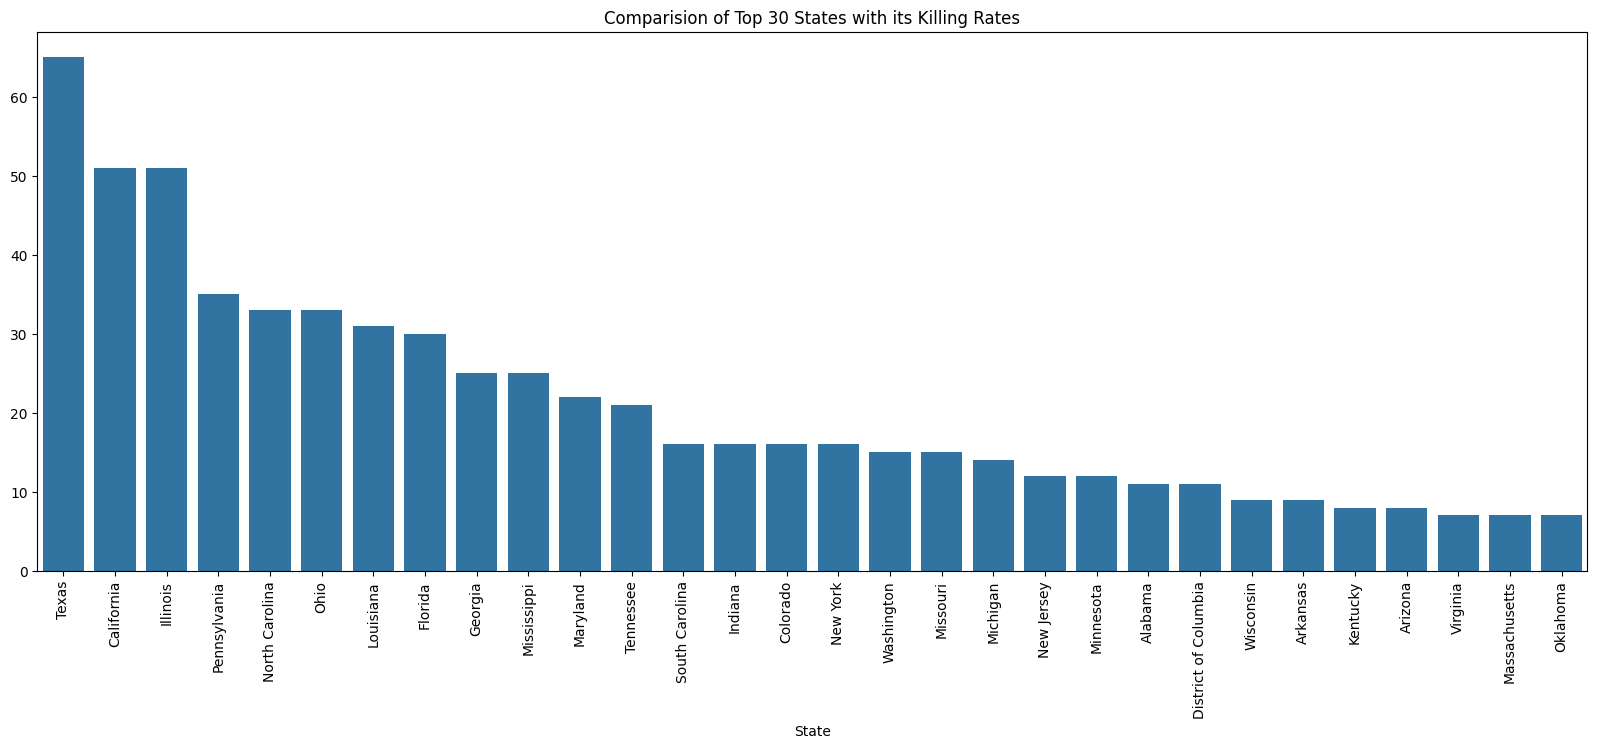

In [6]:
top30_kill_rates = data.groupby("State")["Victims Killed"].count().sort_values(ascending=False).head(30)
plt.figure(figsize=(20,7))
sns.barplot(x=top30_kill_rates.index, y=top30_kill_rates.values)
plt.title('Comparision of Top 30 States with its Killing Rates')
plt.xticks(rotation=90)
plt.show()

In [7]:
numerical_variables = ['Victims Killed', 'Victims Injured', 'Suspects Killed', 'Suspects Injured']

In [8]:
correlation_matrix = data[numerical_variables].corr()

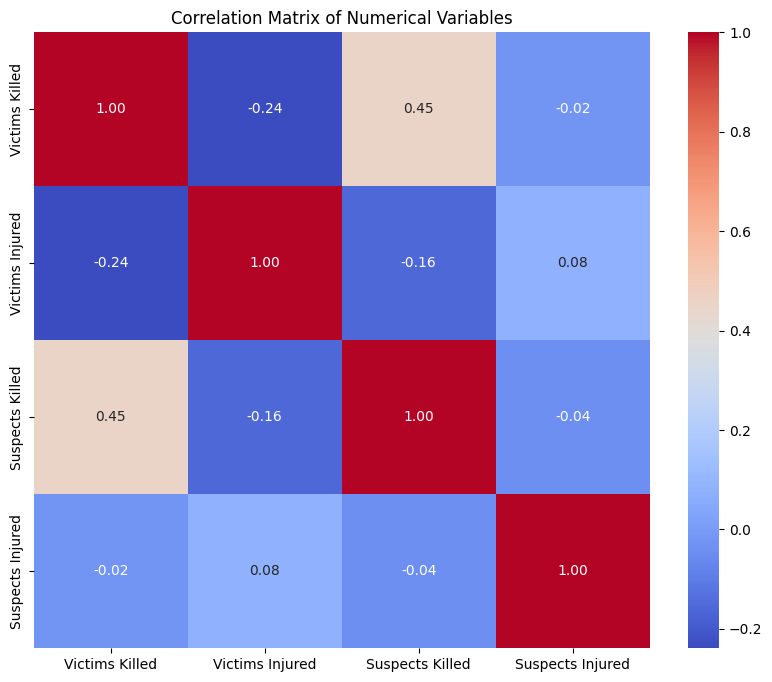

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [10]:
data_2024 = pd.read_csv("/kaggle/input/us-gun-violence-2024/us-gun-violence-2024.csv")

In [11]:
numerical_variables = ['Victims Killed', 'Victims Injured', 'Suspects Killed', 'Suspects Injured']

In [12]:
differences = data_2024[numerical_variables].mean() - data[numerical_variables].mean()

<ipython-input-13-109ba97623f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=differences.index, y=differences.values, palette='coolwarm')


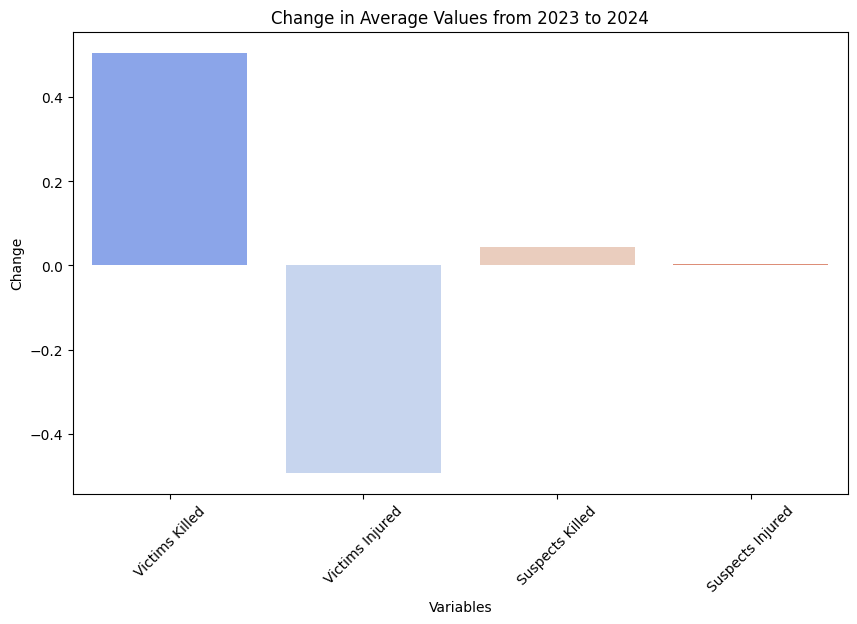

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x=differences.index, y=differences.values, palette='coolwarm')
plt.title('Change in Average Values from 2023 to 2024')
plt.ylabel('Change')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()